## <h1><center>Course: Introduction to Machine Learning</center></h1>
## <h1><center>Assigment 2</center></h1>
### <h1><center>Important NOTE: In order to get full grades, for every question, you need to provide the details of your work on how to get to a solution or the end of the proof</center></h1>
#### <h1><center>Instructor: Tan Bui-Thanh</center></h1>
#### <h1><center>TA: Hai Nguyen</center></h1>
##### <h1><center>Due day: 11:00 pm, Thursday, 22 September, 2022 </center></h1>
#### If you gonna use this jupyter notebook for the assignment, please convert to .pdf file for submission. All submission must be in pdf format except codes.

## **Question 1** (Linear regression + regularization techniques + data augmentation) (+50)

In this problem, we approximate the polynomial from noisy data points. To that end, we generate a data pair $(x^{(i)}, y^{(i)})$ from the following noise-corrupted relation  

$$ y^{(i)} = .5 - {x^{(i)}} - .5 {x^{(i)}}^2 - 2 {x^{(i)}}^3 + 5 {x^{(i)}}^4 + \delta \varphi^{(i)} x^{(i)}$$
of the following  ground truth function
$$ y = .5 - {x} - .5 {x}^2 - 2 {x}^3 + 5 {x}^4$$

where $\delta = 0.05$ is the noise level, $\varphi$ is drawn from standard normal distribution. We need to generate 8 holdout samples and 7 training samples.

- (1.a) (+5) Fill the generating data code and produce figures to visualize data and true functions.


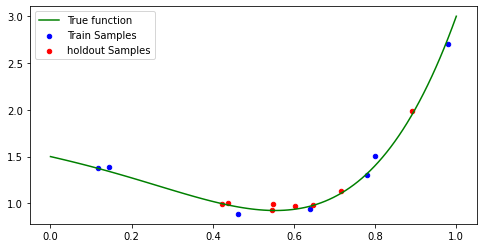

In [301]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 4]

import pandas as pd
from sklearn import datasets
np.random.seed(0)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso, LogisticRegression


order_true = 5
true_coefficient = np.array([.5, -1, -.5, -2, 5])

def true_fn(X):
    f = np.ones((X.shape))
    for i in range(order_true):
        f += true_coefficient[i] * X**i
    return f

# Test samples
n_holdout_samples = 8
X_holdout = np.sort(np.random.rand(n_holdout_samples)) 
Y_holdout = true_fn(X_holdout) + np.random.randn(n_holdout_samples) * 0.05 * true_fn(X_holdout)

# Training samples
n_samples = 7

X = np.sort(np.random.rand(n_samples)) 
Y = true_fn(X) + np.random.randn(n_samples) * 0.05 * true_fn(X)

X_test = np.linspace(0., 1., 100)

plt.plot(X_test,true_fn(X_test),'g',label = 'True function')
plt.scatter(X,Y, edgecolor='b', s=20, facecolor = 'b', label="Train Samples")
plt.scatter(X_holdout,Y_holdout, edgecolor='r', facecolor = 'r', s=20, label="holdout Samples")
plt.legend()

- (1.b) (+5) Perform the LinearRegression() using polynomial approximation of order of 1, 10 and 4. Visualizing each cases to see which case are overfitting, underfitting and good fit. Adding the mean square error of the holdout data to support your observation.

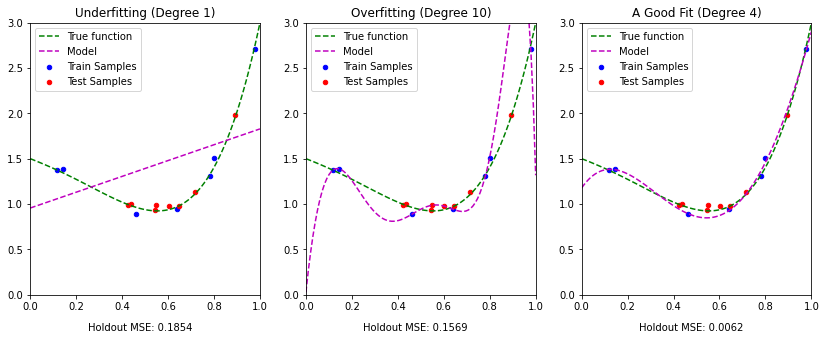

In [302]:
def MSE(y_true, y_predict):
    return ((y_true-y_predict)**2).mean()


degrees = [1, 10, 4]
titles = ['Underfitting', 'Overfitting', 'A Good Fit']
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
    pipeline.fit(X[:, np.newaxis], Y)

    ax.plot(X_test, true_fn(X_test), 'g--', label="True function")    
    ax.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), 'm--', label="Model")
    ax.scatter(X, Y, edgecolor='b', facecolor = 'b', s=20, label="Train Samples")
    ax.scatter(X_holdout, Y_holdout, edgecolor='r', facecolor = 'r', s=20, label="Test Samples")
    ax.set_xlim((0, 1))
    ax.set_ylim((0, 3))
    ax.legend(loc="best")
    ax.set_title("{} (Degree {})".format(titles[i], degrees[i]))
    ax.text(0.25,-.4, 'Holdout MSE: %.4f' % (MSE(Y_holdout,pipeline.predict(X_holdout[:, np.newaxis]))))

- (1.c) (+10) For overfitting senario, applying L2 regularization. You need to do: 
    + step 1: Plot the L2 regularization model versus no regularization model versus the ground truth function in one plot to see how L2 works (pick a reasonable $\lambda$).
    + step 2: Plot the mean square error of holdout data as a function of the regularization parameter $\lambda$ over the range $\lambda \in [10^{-5},10]$. What is the optimal $\lambda$ approximately? 
    + step 3: Using L-curved technique (read [https://www.sintef.no/globalassets/project/evitameeting/2005/lcurve.pdf]) to find out the optimal $\lambda$. The L-curved line is the one represents the relationship between residual norm $||y - f(x,\theta)||_2$ and solution norm $||\theta||_2$. Plot the L-curve and compare the optimal values of $\lambda$ from step 2 and step 3?

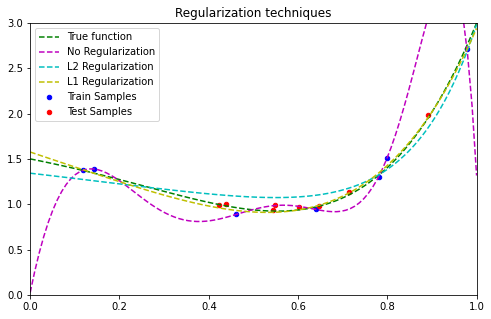

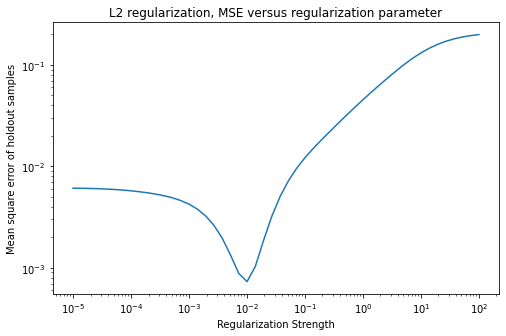

Text(0.5, 1.0, 'L-curved method for L2 regularization, The optimal point is 1.0e-02')

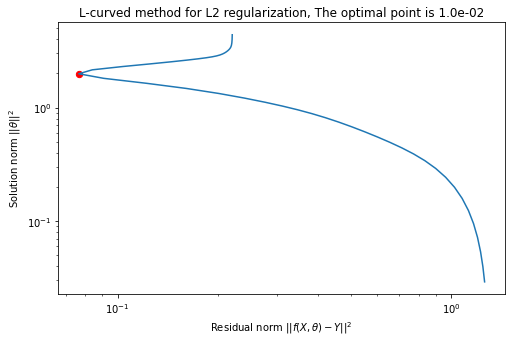

In [303]:
# Step 1 for 1c and 1d
plt.figure(figsize=(8, 5))
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
pipeline.fit(X[:, np.newaxis], Y)
    
# polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
L2_Regularizer = Ridge(alpha=0.1) # sklearn uses alpha instead of lambda
pipeline2 = Pipeline([("pf", polynomial_features), ("lr", L2_Regularizer)])
pipeline2.fit(X[:, np.newaxis], Y)    

# polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
Lasso_regulaizer = Lasso(alpha=0.001) # sklearn uses alpha instead of lambda
pipeline3 = Pipeline([("pf", polynomial_features), ("lr", Lasso_regulaizer)])
pipeline3.fit(X[:, np.newaxis], Y)    

# visualize results
plt.plot(X_test, true_fn(X_test), 'g--',label="True function")    
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), 'm--', label="No Regularization")
plt.plot(X_test, pipeline2.predict(X_test[:, np.newaxis]), 'c--' , label="L2 Regularization") 
plt.plot(X_test, pipeline3.predict(X_test[:, np.newaxis]), 'y--',label="L1 Regularization")    
plt.scatter(X, Y, edgecolor='b', facecolor = 'b', s=20, label="Train Samples")
plt.scatter(X_holdout, Y_holdout, edgecolor='r', facecolor = 'r', s=20, label="Test Samples")
plt.xlim((0, 1))
plt.ylim((0, 3))
plt.legend(loc="best")
plt.title('Regularization techniques')


# Step 2:
lamda = np.logspace(-5, 2, 50)
Error = np.zeros(lamda.shape)
Solution_norm = np.zeros(lamda.shape)
Residual_norm = np.zeros(lamda.shape)
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)

for i in range(len(lamda)):
    L2_Regularizer = Ridge(alpha=lamda[i]) # sklearn uses alpha instead of lambda
    pipeline2 = Pipeline([("pf", polynomial_features), ("lr", L2_Regularizer)])
    pipeline2.fit(X[:, np.newaxis], Y)
    Error[i] = MSE(Y_holdout,pipeline2.predict(X_holdout[:, np.newaxis]))
    Solution_norm[i] = np.linalg.norm(L2_Regularizer.coef_)
    Residual_norm[i] = np.linalg.norm(Y_holdout - pipeline2.predict(X_holdout[:, np.newaxis]))

plt.figure(figsize=(8, 5))
plt.plot(lamda, Error)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Regularization Strength')
plt.ylabel('Mean square error of holdout samples')
plt.title('L2 regularization, MSE versus regularization parameter')
plt.show()

# Step 3:
plt.figure(figsize=(8, 5))
point = 21
plt.plot(Residual_norm, Solution_norm)
plt.scatter(Residual_norm[point], Solution_norm[point], edgecolor='r', facecolor = 'r', s=40, label="L-curve point")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Residual norm ' + r'$||f(X,\theta) - Y||^2$')
plt.ylabel('Solution norm ' + r'$||\theta||^2$')
plt.title('L-curved method for L2 regularization, The optimal point is %.1e' %(lamda[point]))

The optimal point is in the corner, it matches with L-curved method. It is not surprising since L-curved is fundamentally a technique to find find an optimal regularization parameter for the inverse problem. On the one hand, machine learning is almost the same purpose of inverse problem, both of problems aim to find/reconstruct the best parameters/solutions for a given loss function. On the other hand, the regularization is nothing more than restrict space of parameters/solutions in a more sense space. Thus, if we look at this way, most of intuition of two problems are equivalent, i.e., L-curved method here!


- (1.d) (+10) For overfitting senario, applying L1 regularization. Repeat the all 3 steps in the question (1.c).


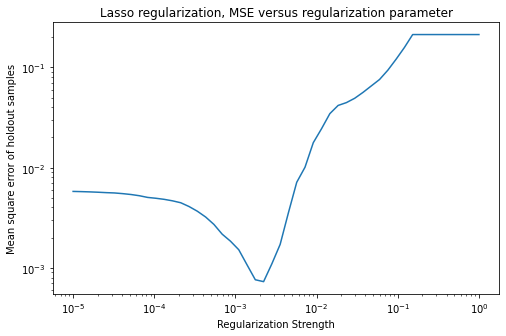

Text(0.5, 1.0, 'L-curved method for Lasso regularization, The optimal point is 2.2e-03')

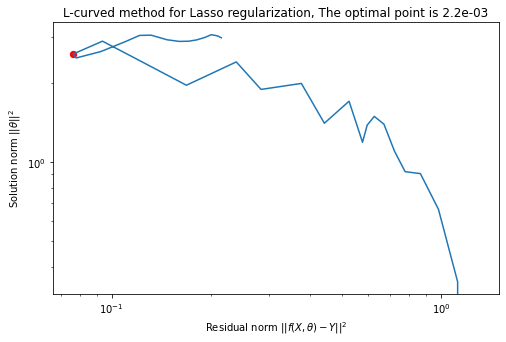

In [304]:
# Step 2:
lamda = np.logspace(-5, 0, 50)
Error = np.zeros(lamda.shape)
Solution_norm = np.zeros(lamda.shape)
Residual_norm = np.zeros(lamda.shape)
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)

for i in range(len(lamda)):
    Lasso_regulaizer = Lasso(alpha=lamda[i]) # sklearn uses alpha instead of lambda
    pipeline3 = Pipeline([("pf", polynomial_features), ("lr", Lasso_regulaizer)])
    pipeline3.fit(X[:, np.newaxis], Y)
    Error[i] = MSE(Y_holdout,pipeline3.predict(X_holdout[:, np.newaxis]))
    Solution_norm[i] = np.linalg.norm(Lasso_regulaizer.coef_)
    Residual_norm[i] = np.linalg.norm(Y_holdout - pipeline3.predict(X_holdout[:, np.newaxis]))

plt.figure(figsize=(8, 5))
plt.plot(lamda, Error)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Regularization Strength')
plt.ylabel('Mean square error of holdout samples')
plt.title('Lasso regularization, MSE versus regularization parameter')
plt.show()

# Step 3:
plt.figure(figsize=(8, 5))
point = 23
plt.plot(Residual_norm, Solution_norm)
plt.scatter(Residual_norm[point], Solution_norm[point], edgecolor='r', facecolor = 'r', s=40, label="L-curve point")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Residual norm ' + r'$||f(X,\theta) - Y||^2$')
plt.ylabel('Solution norm ' + r'$||\theta||^2$')
plt.title('L-curved method for Lasso regularization, The optimal point is %.1e' %(lamda[point]))




- (1.e) (+10) For overfitting senario, applying Elasticnet regularization (a mixture of L1 and L2), i.e., the loss function with Elasticnet regularization is 
$$ J(\theta) = \frac{1}{n} \sum_{i=1}^n L(y^{(i)}, \theta^\top x^{(i)}) + \lambda \cdot ||\theta||_1 + \frac{1}{2} \gamma ||\theta||_2^2$$

We are interested in the performance of the mean square error of the holdout data as a function of $\lambda$ and $\gamma$. One way to achieve this is to plot the contour of the mean square error of the holdout data as a function of $\lambda$ and $\gamma$. Discuss the relationship between Elasticnet and L2, L1 regularization?


Text(0.5, 1.0, 'Contour map of log(MSE) and Elasticnet regularizer')

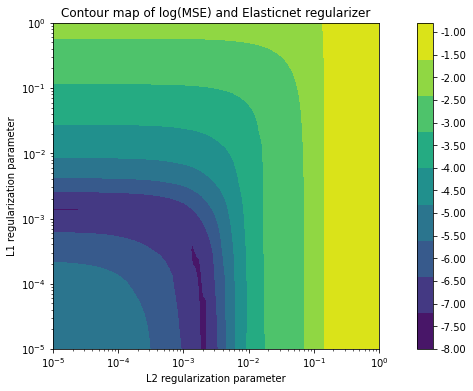

In [305]:
lamda = np.logspace(-5, 0, 50) # for L2 regularization
beta = np.logspace(-5, 0, 50) # for L1 regularization
Error = np.zeros((50,50))
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)

for i in range(len(lamda)):
    for j in range(len(beta)):    
        ElasticNet_regulaizer = ElasticNet(alpha=lamda[i] + beta[j], l1_ratio = beta[j] / (lamda[i] + beta[j]))
        pipeline3 = Pipeline([("pf", polynomial_features), ("lr", ElasticNet_regulaizer)])
        pipeline3.fit(X[:, np.newaxis], Y)
        Error[i, j] = np.log(MSE(Y_holdout,pipeline3.predict(X_holdout[:, np.newaxis])))

plt.figure(figsize=(8,6))
lvls = np.linspace(-8,0,17)
contoursf = plt.contourf(lamda, beta, Error, level = lvls)
plt.colorbar(contoursf,ticks=lvls, format='%.2f')

plt.xlim((1e-5,1)), plt.xlabel('L2 regularization parameter')
plt.ylim((1e-5,1)), plt.ylabel('L1 regularization parameter')
plt.xscale('log')
plt.yscale('log')
plt.axis('square')
plt.title('Contour map of log(MSE) and Elasticnet regularizer')

*Note, the colormap is log(Mean-square-error)*

It can be seen that Elasticnet is better. There is a good combination of $\lambda = 3e-4$ and $\gamma = 2e-3$ gives $1e-7$ mean square error of holdout samples.


- (1.g) (+10) The question is **can we do something else** and yet achieve the same regularization effect? One way to accomplish this is via **data augmentation technique**. The data augmentation technique that we study consists of 4 steps:
    + step 1: Clone 7 training data samples (X in the code) into 350 samples (using numpy.repeat). (Note: this is noise-free data).
    + step 2: We add noise these 350 samples by $$\tilde{x}^i = x^i + \delta \varphi^i,$$ where $\varphi^i$ is drawn from standard normal distribution. We get X_data_augmented.
    + step 3: Similarly, clone 7 training label data into 350 samples (using numpy.repeat), denoted y_data_augmented. 
    + step 4: Using Linearregression to train using data augmented data pairs (X_data_augmented, y_data_augmented).

    You need to (1) generate augmented data, (2) Determine a good noise level $\delta$ by trying different values of $\delta$? Explain why too much or too small noise is not good? To answer the last question, you may need to read the folllowing references
    1. Train Neural Networks With Noise to Reduce Overfitting, [https://machinelearningmastery.com/train-neural-networks-with-noise-to-reduce-overfitting/]
    2. [https://arxiv.org/abs/2208.04995]

Text(0.5, 1.0, 'Data augmentation techniques and Regularization techniques')

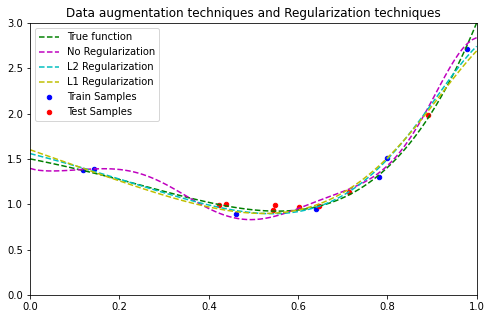

In [306]:
noise_level = .05
clone_times = 50   

X_data_augmented = np.repeat(X, clone_times, axis = 0) + noise_level * np.random.randn(clone_times * X.shape[0], )
Y_data_augmented = np.repeat(Y, clone_times, axis = 0)

# fit a Ridge model
plt.figure(figsize=(8, 5))
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("pf", polynomial_features), ("lr", linear_regression)])
pipeline.fit(X_data_augmented[:, np.newaxis], Y_data_augmented)
    
# polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
L2_Regularizer = Ridge(alpha=0.1) # sklearn uses alpha instead of lambda
pipeline2 = Pipeline([("pf", polynomial_features), ("lr", L2_Regularizer)])
pipeline2.fit(X_data_augmented[:, np.newaxis], Y_data_augmented)    

# polynomial_features = PolynomialFeatures(degree=10, include_bias=False)
Lasso_regulaizer = Lasso(alpha=0.001) # sklearn uses alpha instead of lambda
pipeline3 = Pipeline([("pf", polynomial_features), ("lr", Lasso_regulaizer)])
pipeline3.fit(X_data_augmented[:, np.newaxis], Y_data_augmented)    

# visualize results
plt.plot(X_test, true_fn(X_test), 'g--',label="True function")    
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), 'm--', label="No Regularization")
plt.plot(X_test, pipeline2.predict(X_test[:, np.newaxis]), 'c--' , label="L2 Regularization") 
plt.plot(X_test, pipeline3.predict(X_test[:, np.newaxis]), 'y--',label="L1 Regularization")    
plt.scatter(X, Y, edgecolor='b', facecolor = 'b', s=20, label="Train Samples")
plt.scatter(X_holdout, Y_holdout, edgecolor='r', facecolor = 'r', s=20, label="Test Samples")
plt.xlim((0, 1))
plt.ylim((0, 3))
plt.legend(loc="best")
plt.title('Data augmentation techniques and Regularization techniques')

$\delta = 0.05$ is good noise level.

Data augmentation is equivalent to Tikhonov regularization (L-2 regularization is a special case of Tikhonov regularization). In this problem, the strength of regularization term is proportional to the square of magnitude of noise level. Thus, too large noise level is equivalent to using too large regularzation (L-2, you can understand in this way). As a result, the function should converge to a constant (why? I let you think about it, and come back to discuss with me if you are interested in). Meanwhile, too small noise level means there is no regularization at all. Hence, overfitting can be observed.

## **Question 2** (Logistic regression) (+50)

In this problem, we will use regression to classify two types of iris flowers ('Iris Versicolour', 'Iris Virginica') based on 4 features (petal length, petal width, sepal length, sepal width). Recall that for linear regression our model class is given as
$$
z = \theta^T x.
$$
where $\theta = \{\theta_0, ..., \theta_n\}$, and $x = \{1, x_1, ..., x_n\}$ with $n$ as the number of input attributes/features.
We define the probability of prediction y of the model class given x feature set reads
$$
p(y|x) = \frac{1}{1 + e^{-z}}.
$$
For logistic regression, we need to define a loss function (to accommodate the nature of the classification problem). We choose to use the cross entropy loss which is given as
$$
\mathcal{L}(\theta) = - \frac{1}{N} \sum_{i=1}^{N} y^{(i)} \, log(p(y|x)^{(i)}) + (1 - y^{(i)}) \, log(1 - p(y|x)^{(i)})
$$
where $y^{(i)}$ is the label of i*th* flower. y = 0 for 'Iris Versicolour' type and $y = 1$ for 'Iris Virginica' type. And, N is number of train samples.

We pick N = 80 for training data, and the holdout data of 20 samples, given by the code below.

1. (+10) Derive the gradient expression of the loss function for logistic regression.

Step 1: Let us rearrange the data matrices. Lables are row vector of shape (1xN) 
$$ Y = y^i = [ y^{(1)}, y^{(2)}, ..., y^{(N)}].$$
The features data of N sample are arranged in matrix of shape (4 x N) 
$$ X = x_{j}^{i}  = \begin{bmatrix}
{x}_1^{(1)} & |  & ...  & |  & ... & | \\
{x}_2^{(1)} & {x}_j^{(2)} & ... & {x}_j^{(i)} & ... & {x}_j^{(N)}  \\
{x}_3^{(1)} & |  & ...  & |  & ... & |  \\
{x}_4^{(1)} & |  & ...  & |  & ... & | 
\end{bmatrix}$$
Here $i$ is sample index, $j$ is the feature index. And the parameter is a column vector of shape (4 x 1).

Step 2: Recall some useful derivatives
$$\frac{d}{dz} \ln (z) = \frac{1}{z}$$
and 
$$ \frac{d}{dz} p(z) = p(z) [1 - p(z)].$$

Step 3: Now we compute the gradient of the loss function w.r.t. parameter $\theta_j$

\begin{align*}
\mathcal{L}^{(i)}(\theta) = - \frac{1}{N} \sum_{i=1}^{N} \left( y^{(i)} \, log(p(\theta^T x^{(i)})) + (1 - y^{(i)}) \, log(1 - p(\theta^T x^{(i)})) \right)
\end{align*}
Using the chain rule 
\begin{align*}
\frac{\partial}{\partial\theta_j} \mathcal{L}(\theta) & =  - \frac{1}{N} \sum_{i=1}^{N} \left( \frac{\partial}{\partial\theta_j} y^{(i)} \, log(p(\theta^T x^{(i)})) + \frac{\partial}{\partial\theta_j} (1 - y^{(i)}) \, log(1 - p(\theta^T x^{(i)})) \right) \\ 
& =  - \frac{1}{N} \sum_{i=1}^{N} \left( \frac{y^{(i)}}{p(\theta^T x^{(i)}) } \frac{\partial}{\partial\theta_j} [p(\theta^T x^{(i)})] + \frac{1 - y^{(i)}}{1 - p(\theta^T x^{(i)}) } \frac{\partial}{\partial\theta_j} [1 - p(\theta^T x^{(i)})]  \right) \\
& =  - \frac{1}{N} \sum_{i=1}^{N} \left( \frac{y^{(i)}}{\cancel{p(\theta^T x^{(i)})} } \cancel{p(\theta^T x^{(i)})} [1 - p(\theta^T x^{(i)})] \frac{\partial}{\partial\theta_j} [\theta^T x^{(i)})] - \frac{1 - y^{(i)}}{\cancel{1 - p(\theta^T x^{(i)})} } p(\theta^T x^{(i)}) [\cancel{1 - p(\theta^T x^{(i)})}] \frac{\partial}{\partial\theta_j} [\theta^T x^{(i)})]  \right) \\
& =  - \frac{1}{N} \sum_{i=1}^{N} \left( (y^{(i)} -  p(\theta^T x^{(i)})) x_{j}^{(i)}\right)
\end{align*}

By simple rearrangement (I recommend you do this step by yourself again, it is a very useful skill.)
$$\frac{\partial}{\partial\theta_j} \mathcal{L}(\theta) = - \frac{1}{N} (Y - p(\theta^T X)) \, (X[j,:])^T$$
$$\Downarrow$$
$$\frac{\partial}{\partial\theta} \mathcal{L}(\theta) = - \frac{1}{N} X  (Y - p(\theta^T X))^T$$
Here, $X[j,:]$ means the $j$ th row of $X$.

Step 4: Building up the gradescent algorithm
$$ \theta^{n+1} = \theta^{n} + \eta_n \frac{\partial}{\partial\theta} \mathcal{L}(\theta^{n}), $$
where $\eta_n$ is the learning rate.

2. (+10) Performing Logistic regression using the gradient descent codes that you wrote in the first homework. Plot your classfication on the testing data and report the percentage of misclassifications (circling the wrong prediction point with figure in 2.a, see lecture 1 for diabetes risk example).


In [322]:
from sklearn import datasets

# Load and visualize the Iris flower dataset
iris = datasets.load_iris()
iris.target[50:100] = 0
iris.target[100:150] = 1

N = 8 # training samples

# X = np.concatenate((iris.data[50:60], iris.data[100:110]), axis = 0)
X = np.reshape(np.concatenate((iris.data[50:50+int(N/2)], iris.data[100:100+int(N/2)]), axis = 0), (4, N))
X = np.concatenate((X, np.ones((1,N))), axis = 0)
y = np.reshape(np.concatenate((iris.target[50:50+int(N/2)], iris.target[100:100+int(N/2)]), axis = 0), (1, N))

X_holdout = np.reshape(np.concatenate((iris.data[50+int(N/2):100], iris.data[100+int(N/2):150]), axis = 0), (4, 100-N))
X_holdout = np.concatenate((X_holdout, np.ones((1,100-N))), axis = 0)
y_holdout = np.reshape(np.concatenate((iris.target[50+int(N/2):100], iris.target[100+int(N/2):150]), axis = 0), (1, 100-N))


def sigmoid_function( x):
    if x >= 0:
        z = np.exp(-x)
        return 1 / (1 + z)
    else:
        z = np.exp(x)
        return z / (1 + z)
    
def sigmoid(x):
    return np.array([sigmoid_function(value) for value in x])

def compute_loss(y_true, y_pred):
    # binary cross entropy
    y_zero_loss = y_true * np.log(y_pred + 1e-9)
    y_one_loss = (1-y_true) * np.log(1 - y_pred + 1e-9)
    return -np.mean(y_zero_loss + y_one_loss)

def predict(theta, x):
    probabilities = sigmoid(np.matmul(theta, x))
    return [1 if p > 0.5 else 0 for p in probabilities]

def fit(x, y, epochs):
    
    theta = np.zeros(x.shape[0])
    
    for i in range(epochs):
        pred = sigmoid(np.matmul(theta, x))
        loss = compute_loss(y, pred)
        
        # error_w, error_b = compute_gradients(x, y, pred)
        theta =  theta - learning_rate * np.matmul(x, (pred - y).T).flatten()

        pred_to_class = predict(theta, x)
        
        losses.append(loss)
        
    return losses, theta


learning_rate = 2e-2
losses = []

losses, theta = fit(X, y, 10000)

y_pred = predict(theta, X_holdout)


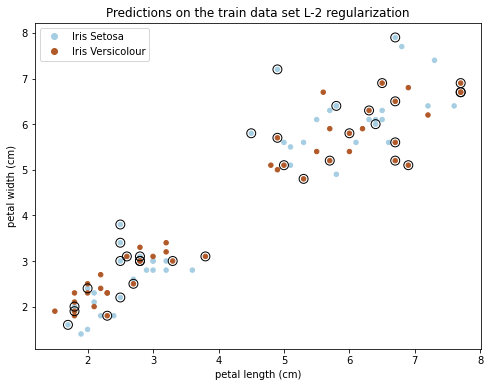

In [323]:
index_error = (y_pred - y_holdout).flatten() != 0

plt.figure(figsize=(8,6))
p1 = plt.scatter(X_holdout[2,:], X_holdout[3,:], alpha=1, c=y_holdout, cmap='Paired', s=20)
plt.scatter(X_holdout[2, index_error], X_holdout[3, index_error], marker='o', s=80, facecolors='none', edgecolors='k')
plt.ylabel("petal width (cm)")
plt.xlabel("petal length (cm)")
plt.title("Predictions on the train data set L-2 regularization")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])

3. (+15) Performing Logistic regression with L2 regularization using the gradient descent codes that you wrote in the first homework. Plot your classfication on the testing data and report the percentage of misclassifications.


4. (+5) Performing Logistic regression, using scikit-learn function [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html] compare the results with question 2.


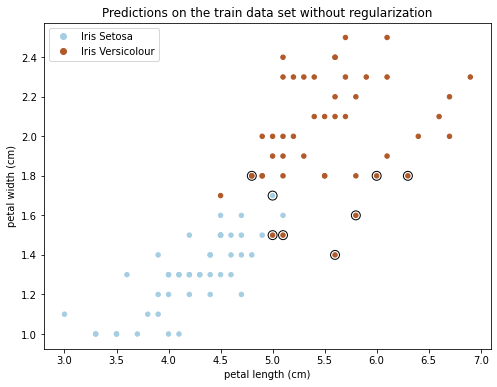

In [317]:
from sklearn import datasets

# Load and visualize the Iris flower dataset
iris = datasets.load_iris()
iris.target[50:100] = 0
iris.target[100:150] = 1
iris.data[50:150, :2] = 0
a, b = 54,104
X = np.concatenate((iris.data[50:a], iris.data[100:b]), axis = 0)
y = np.concatenate((iris.target[50:a], iris.target[100:b]), axis = 0)

X_holdout = np.concatenate((iris.data[a:100], iris.data[b:150]), axis = 0)
y_holdout = np.concatenate((iris.target[a:100], iris.target[b:150]), axis = 0)


pipeline_no_reg = Pipeline([("pf", LogisticRegression(random_state=0, solver = 'sag', penalty = 'none'))])
pipeline_no_reg.fit(X,y)
y_pred = pipeline_no_reg.predict(X_holdout)
index_error = (y_pred - y_holdout) != 0

plt.figure(figsize=(8,6))
p1 = plt.scatter(X_holdout[:,2], X_holdout[:,3], alpha=1, c=y_holdout, cmap='Paired', s=20)
plt.scatter(X_holdout[index_error, 2], X_holdout[index_error, 3], marker='o', s=80, facecolors='none', edgecolors='k')
plt.ylabel("petal width (cm)")
plt.xlabel("petal length (cm)")
plt.title("Predictions on the train data set without regularization")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])


5. (+5) Performing Logistic regression with L2 regularization , using scikit-learn function [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html], compare the results with question 3.


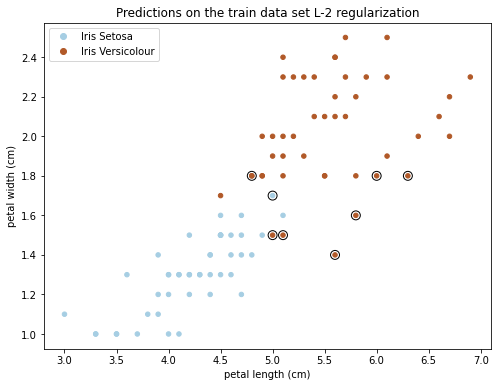

In [319]:
pipeline_L2_reg = Pipeline([("pf", LogisticRegression(random_state=0, penalty = 'l2'))])
pipeline_no_reg.fit(X,y)
y_pred = pipeline_no_reg.predict(X_holdout)
index_error = (y_pred - y_holdout) != 0

plt.figure(figsize=(8,6))
p1 = plt.scatter(X_holdout[:,2], X_holdout[:,3], alpha=1, c=y_holdout, cmap='Paired', s=20)
plt.scatter(X_holdout[index_error, 2], X_holdout[index_error, 3], marker='o', s=80, facecolors='none', edgecolors='k')
plt.ylabel("petal width (cm)")
plt.xlabel("petal length (cm)")
plt.title("Predictions on the train data set L-2 regularization")
plt.legend(handles=p1.legend_elements()[0], labels=['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'])


6. (+5) Comparing the number of wrongly predicted points from part 2 and part 3. Discuss the reason for your answer.

This problem is well captured by logistic regression (no overfitting), so L-2 regularization does not play a significant role. There are possible reasons: (1) the holdout data is closed to train data, (2) we have 4 features to distinguish 2 types and over a small data space the model itself is sufficient.